<p></p>
<br/>
<div id="sec_conclusion" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        		<font color=#FF7500 size=6>
تمرین اول درس یادگیری ماشین برای بیوانفورماتیک
                    <br>
                    علیرضا اکبری ۹۵۱۰۵۳۷۹
        </font>
		<p></p>
		<hr>
    </font>
</div>

In [1]:
import numpy as np
import pandas as pd
from utils import *
from DecisionTree import *
from kNN import *
import matplotlib.pyplot as plt
np.random.seed(2)
%load_ext autoreload
%autoreload 2

In [2]:
path_to_data = ''
target_column = 'target'
X,y = read_data(path_to_data, target_column)
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [3]:
X_tr, y_tr, X_te, y_te = data_split(X, y, 0.8)
print(X_tr.shape, y_tr.shape)
print(X_te.shape, y_te.shape)

(242, 13) (242,)
(61, 13) (61,)


<p></p>
<br/>
<div id="sec_conclusion" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        		<font color=#FF7500 size=6>
Decision Tree
        </font>
		<p></p>
		<hr>
    </font>
</div>

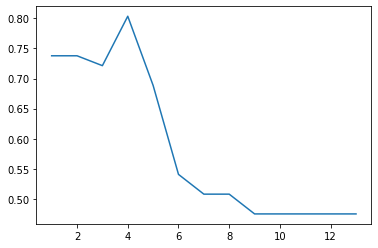

In [4]:
x_axis, y_axis = [], []
for i in range(1,14):
    x_axis.append(i)
    dec_tree_model = DecisionTree(i, 0.8)
    dec_tree_model.fit(X_tr, y_tr)
    y_pred_dec = dec_tree_model.predict(X_te)
    y_axis.append(precision_calc(y_pred_dec, y_te))
plt.plot(x_axis, y_axis)

<p></p>
<br/>
<div id="sec_conclusion" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
		<hr>
        ابتدا باید دقت کنیم که ترشولد را در این نمودار ثابت گرفته‌ایم و تنها عمق تغییر کرده است. همانطور که مشاهده می‌شود با افزایش عمق، نتایج بهتر شده است اما از یک جایی به بعد نتیجه معکوس داشته است که این می‌تواند به دلیل
        overfitting
        باشد. همچنین این روش نمی‌تواند برای انتخاب هایپرپارامترها مناسب باشد چرا که ممکن است شانسی داده‌های ترین و تست منجر به تولید این نتایج شده باشند. بنابراین از روش
        5fold-cross-validation
        استفاده می‌کنیم.
    </font>
</div>

In [5]:
num_folds = 5
depth_choices = [i for i in range(1, 14)]
threshold_choices = [0.2, 0.4, 0.6, 0.8]

X_tr_folds = []
y_tr_folds = []

X_tr_folds = np.array_split(X_tr, num_folds)
y_tr_folds = np.array_split(y_tr, num_folds)

depth_thresh_accuracies = {}
for i in depth_choices:
    for j in threshold_choices:
        depth_thresh_accuracies[(i,j)] = []

for d in depth_choices:
    for t in threshold_choices:
        for i in range(num_folds):
            temp_X_valid = X_tr_folds[i]
            temp_y_valid = y_tr_folds[i]
        
            temp_X_train = np.concatenate(tuple(X_tr_folds[:i]) + tuple(X_tr_folds[i+1:]))
            temp_y_train = np.concatenate(tuple(y_tr_folds[:i]) + tuple(y_tr_folds[i+1:]))
            
            dec_tree_model = DecisionTree(d, t)
            dec_tree_model.fit(temp_X_train, temp_y_train)
            y_pred_dec = dec_tree_model.predict(temp_X_valid)
            depth_thresh_accuracies[(d,t)].append(precision_calc(y_pred_dec, temp_y_valid))



In [6]:
for d in depth_choices:
    for t in threshold_choices:
        print("mean: ", np.mean(np.array(depth_thresh_accuracies[(d,t)])))
        for accuracy in depth_thresh_accuracies[(d,t)]:
            print('depth = %d, threshold = %f, accuracy = %f' % (d,t, accuracy))
        print("---------")

mean:  0.45926870748299314
depth = 1, threshold = 0.200000, accuracy = 0.448980
depth = 1, threshold = 0.200000, accuracy = 0.326531
depth = 1, threshold = 0.200000, accuracy = 0.541667
depth = 1, threshold = 0.200000, accuracy = 0.437500
depth = 1, threshold = 0.200000, accuracy = 0.541667
---------
mean:  0.45926870748299314
depth = 1, threshold = 0.400000, accuracy = 0.448980
depth = 1, threshold = 0.400000, accuracy = 0.326531
depth = 1, threshold = 0.400000, accuracy = 0.541667
depth = 1, threshold = 0.400000, accuracy = 0.437500
depth = 1, threshold = 0.400000, accuracy = 0.541667
---------
mean:  0.735374149659864
depth = 1, threshold = 0.600000, accuracy = 0.816327
depth = 1, threshold = 0.600000, accuracy = 0.693878
depth = 1, threshold = 0.600000, accuracy = 0.750000
depth = 1, threshold = 0.600000, accuracy = 0.770833
depth = 1, threshold = 0.600000, accuracy = 0.645833
---------
mean:  0.735374149659864
depth = 1, threshold = 0.800000, accuracy = 0.816327
depth = 1, thresho

In [7]:
optimal_depth , optimal_thresh = 6, 0.6
dec_tree_model = DecisionTree(optimal_depth, optimal_thresh)
dec_tree_model.fit(X_tr, y_tr)
y_pred_dec = dec_tree_model.predict(X_te)
print(precision_calc(y_pred_dec, y_te))

0.7377049180327869


In [8]:
TP, FP, TN, FN = confusion_matrix(y_pred_dec, y_te)
print("Decision Tree Confusion Matrix")
print("TP: ", TP, "FP: ", FP, "TN: ", TN, "FN: ", FN)

Decision Tree Confusion Matrix
TP:  30 FP:  9 TN:  22.0 FN:  15


In [9]:
Accuracy, Precision, Recall, Specifity, f1score = classification_report(y_pred_dec, y_te)
print("Decision Tree Classification Report")
print("Accuracy: ", Accuracy, "Precision: ", Precision, "Recall: ", Recall, "Specifity: ", Specifity, "f1score: ", f1score)

Decision Tree Classification Report
Accuracy:  0.6842105263157895 Precision:  0.7692307692307693 Recall:  0.6666666666666666 Specifity:  0.7096774193548387 f1score:  0.7142857142857142


<p></p>
<br/>
<div id="sec_conclusion" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        		<font color=#FF7500 size=6>
kNN
        </font>
		<p></p>
		<hr>
در اینجا ابتدا نتایج 
        knn
      را روی خود داده آموزش می‌بینیم. همانطور که مورد انتظار بود
        k=1
        بهترین جواب است چرا که هر داده خودش را پیش‌بینی می‌کند که قاعدتا درست خواهد بود
	</font>
</div>

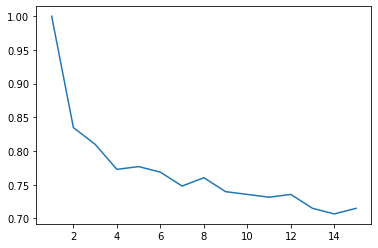

In [10]:
x_axis, y_axis = [], []
for i in range(1, 16):
    kNN_model = kNN(i)
    kNN_model.fit(X_tr, y_tr)
    y_pred_knn = kNN_model.predict(X_tr)
    x_axis.append(i)
    y_axis.append(precision_calc(y_pred_knn, y_tr))
plt.plot(x_axis,y_axis)

<p></p>
<br/>
<div id="sec_conclusion" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
		<hr>
        حال 
        knn
        روی داده تست داریم
    </font>
</div>

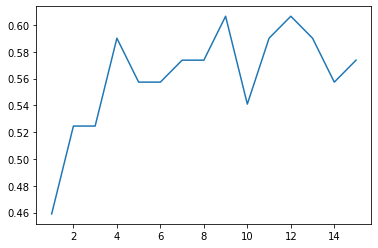

In [11]:
x_axis, y_axis = [], []
for i in range(1, 16):
    kNN_model = kNN(i)
    kNN_model.fit(X_tr, y_tr)
    y_pred_knn = kNN_model.predict(X_te)
    x_axis.append(i)
    y_axis.append(precision_calc(y_pred_knn, y_te))
plt.plot(x_axis,y_axis)

<p></p>
<br/>
<div id="sec_conclusion" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
		<hr>
       در اینجا از نمودار مشخص است که نمودار دارای یک رفتار خاص براساس کاهش یا افزایش 
        k
        نمی‌باشد و به ازای یک 
        k
        خاص دقت بیشینه خواهد شد. که حدود عدد ۷ می‌باشد.
        <br>
        همچنین نمی‌توان با استفاده از این نتایج 
        k
        را تعیین کرد.چرا که در ابتدا هیچ‌گاه پارامترها و هایپرپارامترها را با نگاه کردن به داده تست انتخاب نمی‌کنیم. همچنین چرا که داده تست و ترین به صورت تصادفی انتخاب شده‌اند و ممکن است با یک بار دیگر بر زدن داده، نتایج متفاوت شود و دیگر 
        k=7
        بهترین مقدار نباشد. پس برای بدست آوردن 
        k
        مناسب همانطور که گفته شده است از
        5fold-cross-validation
        استفاده می‌کنیم.
	</font>
</div>

In [12]:
num_folds = 5
k_choices = [i for i in range(1, 16)]

X_tr_folds = []
y_tr_folds = []

X_tr_folds = np.array_split(X_tr, num_folds)
y_tr_folds = np.array_split(y_tr, num_folds)

k_accuracies = {}
for k in k_choices:
    k_accuracies[k] = []

for k in k_choices:
    for i in range(num_folds):
        temp_X_valid = X_tr_folds[i]
        temp_y_valid = y_tr_folds[i]
        
        temp_X_train = np.concatenate(tuple(X_tr_folds[:i]) + tuple(X_tr_folds[i+1:]))
        temp_y_train = np.concatenate(tuple(y_tr_folds[:i]) + tuple(y_tr_folds[i+1:]))
        
        kNN_model = kNN(k)
        kNN_model.fit(temp_X_train, temp_y_train)
        y_pred_knn = kNN_model.predict(temp_X_valid)
        k_accuracies[k].append(precision_calc(y_pred_knn, temp_y_valid))

In [13]:
for k in k_accuracies:
    print("mean: ",np.mean(np.array(k_accuracies[k])))
    for accuracy in k_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))
    print("--------")

mean:  0.6116496598639456
k = 1, accuracy = 0.571429
k = 1, accuracy = 0.632653
k = 1, accuracy = 0.583333
k = 1, accuracy = 0.708333
k = 1, accuracy = 0.562500
--------
mean:  0.5789965986394559
k = 2, accuracy = 0.551020
k = 2, accuracy = 0.489796
k = 2, accuracy = 0.625000
k = 2, accuracy = 0.645833
k = 2, accuracy = 0.583333
--------
mean:  0.6405612244897959
k = 3, accuracy = 0.673469
k = 3, accuracy = 0.591837
k = 3, accuracy = 0.645833
k = 3, accuracy = 0.625000
k = 3, accuracy = 0.666667
--------
mean:  0.6280612244897961
k = 4, accuracy = 0.673469
k = 4, accuracy = 0.591837
k = 4, accuracy = 0.645833
k = 4, accuracy = 0.583333
k = 4, accuracy = 0.645833
--------
mean:  0.6487244897959183
k = 5, accuracy = 0.653061
k = 5, accuracy = 0.653061
k = 5, accuracy = 0.687500
k = 5, accuracy = 0.625000
k = 5, accuracy = 0.625000
--------
mean:  0.6489795918367347
k = 6, accuracy = 0.653061
k = 6, accuracy = 0.591837
k = 6, accuracy = 0.708333
k = 6, accuracy = 0.687500
k = 6, accuracy 

<p></p>
<br/>
<div id="sec_conclusion" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
		<hr>
        با نتایج بدست آمده
        k=11
        را انتخاب می‌کنیم
	</font>
</div>

In [14]:
kNN_model = kNN(7)
kNN_model.fit(X_tr, y_tr)
y_pred_knn = kNN_model.predict(X_te)
print(precision_calc(y_pred_knn, y_te))

0.5737704918032787


In [15]:
TP, FP, TN, FN = confusion_matrix(y_pred_knn, y_te)
print("KNN Confusion Matrix")
print("TP: ", TP, "FP: ", FP, "TN: ", TN, "FN: ", FN)

KNN Confusion Matrix
TP:  24 FP:  13.0 TN:  26.0 FN:  11


In [16]:
Accuracy, Precision, Recall, Specifity, f1score = classification_report(y_pred_knn, y_te)
print("KNN Classification Report")
print("Accuracy: ", Accuracy, "Precision: ", Precision, "Recall: ", Recall, "Specifity: ", Specifity, "f1score: ", f1score)

KNN Classification Report
Accuracy:  0.6756756756756757 Precision:  0.6486486486486487 Recall:  0.6857142857142857 Specifity:  0.6666666666666666 f1score:  0.6666666666666667


In [17]:
print(t_test(y_pred_knn, y_pred_dec, y_te))
print("Best kNN: ", precision_calc(y_pred_knn, y_te))
print("Best Decision Tree: ", precision_calc(y_pred_dec, y_te))

True
Best kNN:  0.5737704918032787
Best Decision Tree:  0.7377049180327869


<p></p>
<br/>
<div id="sec_conclusion" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
		<hr>
نتیجه آزمون فرض با 
        p-value
        کمتر از 
        ۰.۰۵
        برقرار است. که فرض 
        H_0
        ما این بود که دو مدل هیچ تفاوتی ندارند و فرض 
        H_1
        این بود که درخت تصمیم بهتر عمل می‌کند. حال با توجه به نتیجه آزمون تی، می‌توان فرض صفر را رد کرد و گفت که اختلاف معنادار وجود دارد و در نتیجه درخت تصمیم مدل بهتری بوده است
    </font>
</div>